In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

# References

Sir Shared a code6.ipynb file

In [2]:
# function to display the image and the title of an image
def showImage(image,title):
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

In [3]:
def loadImage(path):
    # read the image
    image = cv2.imread(path)
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

# Description_Question-1

First we have to Read the image and convert it into gray scale and store them as image1.Then blur the image and  then threshold the image to find the contours. The three circles were detected and then we simply find the center of contours which are the center of the circles in the form of x,y cordinates.Then we simply draw a line using x,y cordinates from one center to another .Thus all the center of three circles were linked and form a triangle.Then to find the required angle ,we have three lengths of trianle we simply use distance formula and then put values in cosine law formula and get angle radian and then converted to degree.

# Question-1

In [4]:
def lengthSquare(X, Y): 
    xDiff = X[0] - Y[0] 
    yDiff = X[1] - Y[1] 
    return xDiff * xDiff + yDiff * yDiff

def displayAngle(A, B, C,image): 
      
    # Square of lengths be a2, b2, c2 
    a2 = lengthSquare(B, C) 
    b2 = lengthSquare(A, C) 
    c2 = lengthSquare(A, B) 
  
    # length of sides be a, b, c 
    a = math.sqrt(a2); 
    b = math.sqrt(b2); 
    c = math.sqrt(c2); 
  
    # From Cosine law 
    betta = math.acos((a2 + c2 - b2) / 
                         (2 * a * c));  
    # Converting to degree 
    betta = betta * 180 / math.pi; 
  
    # displaying all the angle
    image=cv2.putText(image,str(int(betta)),(95,175),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),1)
    return image

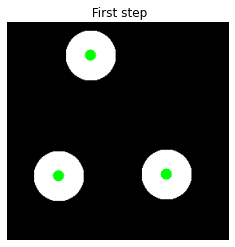

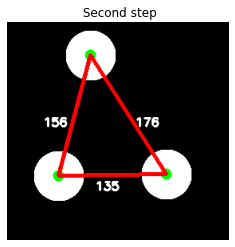

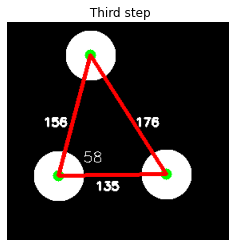

In [5]:
# read the image
image1 = cv2.imread("img1.png")
# convert to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all centers of circles
cnt=0
lst=[]
for i in contours:
    if cnt==0:
        cnt=cnt+1
        continue
    M = cv.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv.circle(image1, (cx, cy), 7, (0, 255,0), -1)
        lst.append((cx,cy))
# display the image with centers 
showImage(image1," First step")

# draw lines
cv2.line(image1, (64,192),(199, 190), (255,0,0), 3)
cv2.line(image1, (64,192),(104, 41), (255,0,0), 3)
cv2.line(image1, (199, 190),(104, 41), (255,0,0), 3)
# finding the distance of each line and display on a image 
point1x, point1y = (64,192)
point2x, point2y = (199, 190)
Distance = int(math.sqrt((point1x-point2x)**2 + (point1y-point2y)**2))
image1=cv2.putText(image1,str(Distance),(110,210),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)

point1x, point1y = (64,192)
point2x, point2y = (104, 41)
Distance = int(math.sqrt((point1x-point2x)**2 + (point1y-point2y)**2))
image1=cv2.putText(image1,str(Distance),(45,130),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)

point1x, point1y = (199, 190)
point2x, point2y = (104, 41)
Distance = int(math.sqrt((point1x-point2x)**2 + (point1y-point2y)**2))
image1=cv2.putText(image1,str(Distance),(160,130),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)

showImage(image1," Second step")

# finding the angle and display it

image1=displayAngle((64,192),(199, 190), (104, 41),image1)

showImage(image1," Third step")

# Question2_Description

Read the image as image2 in gray scale.Then blur the image and then threshold the image to find the contours. Then step by step find the parameter of each wave that's simply means the frequency of wave in image. and display the parameter. Then find the  wave with largest parameter and draw a bounding box around it using  opencv cv2.rectangle function.

# Question-2

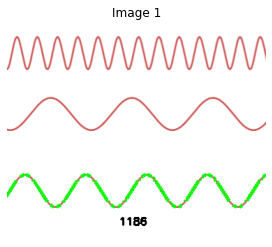

------------------------------------------------------------------


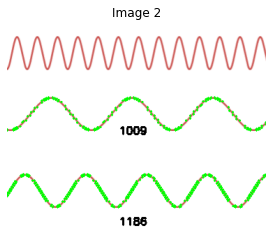

------------------------------------------------------------------


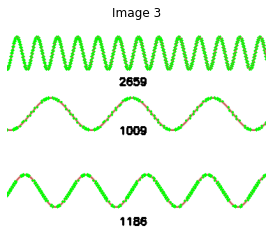

------------------------------------------------------------------


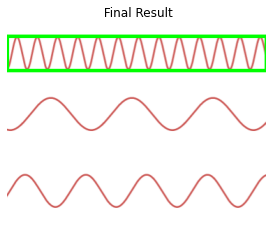

In [6]:
# read the image
image2 = cv2.imread("img2.png")
# convert to RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
ln=[290,160,90]
max_pr=0
max_pr_indx=0
# iterate loop in contours to display it step by step
for i in range(len(contours)):
    image2 = cv2.drawContours(image2,contours[i], -1, (0, 255, 0), 2)
#     find the parameter
    perimeter = int(cv2.arcLength(contours[i],True))
    if(max_pr<perimeter):
#         saving the largest paramter
        max_pr_indx=i
#     disply parameter on image
    cv2.putText(image2,str(perimeter),(160,ln[i]),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
    showImage(image2,"Image "+str(i+1))
    print("------------------------------------------------------------------")
# loading image for bounding box
temp = cv2.imread("img2.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
# draw a bounding box on wave with highest frquency 
x,y,w,h = cv2.boundingRect(contours[max_pr_indx])
cv2.rectangle(temp,(x,y),(x+w,y+h),(0,255,0),3)
# displaying the final result
showImage(temp," Final Result")

# Question3_Description

Read the image as image3 in gray scale.Then blur the image and then threshold the image by setting lower value to 165 and upper value to 240 so that it clearly find the white strips of zebra crossings and remove noice.Then find all the contours. And then fikter out only those that form a rectangle because white strips are our required objects in the image so we have to find only specific contours aound the object that form a rectangle, So at end we have the bounding rectangle around the white strips of zebra crossing.And to count number of strips we simply count the contours.

# Question-3

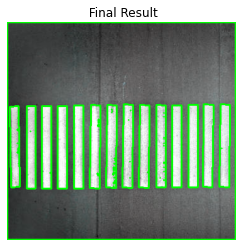

In [82]:
# read the image
image3 = cv2.imread("img3.png",cv2.IMREAD_COLOR)
# convert to grayscale
gray = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 165, 240, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
for c in contours:
#     filtering the contours of rectangle type
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a green rectangle
    image3 = cv2.drawContours(image3, [box],0, (0, 255, 0), 2)
showImage(image3," Final Result")


# Question4_Description

load the video and check it for successful loading and playing other wise display error. after successful loading we converting it to gray scale and then blur  each frame and threshold the imae to find contours of each frame and also we are finding the center of circles using cv2.circle function and we are extracting the Y value of blue circle that is graually changing as the blue circle moves soo we have a check where both blue and green circles y value are equal there we are pausing the value and waiting for entering any key to continue

# Question-4

In [43]:
cap = cv2.VideoCapture('animation.mp4')
y=0
try:
    if (cap.isOpened()== False): 
        raise Exception('Error opening video stream or file')
    fps = cap.get(cv2.CAP_PROP_FPS)
    fps = int(fps)
    # Read until video is completed
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (5,5), 0)
            # create a binary thresholded image
            _, binary = cv2.threshold(blur, 165, 240, cv2.THRESH_BINARY_INV)
            # find the contours from the thresholded image
            contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            for i in range(len(contours)):
                M = cv2.moments(contours[i])
                prevY=y
                x = int(M["m10"] / M["m00"])
                y = int(M["m01"] / M["m00"])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
                cv2.drawContours(frame, contours,i,(255,0,0),2)
            cv2.imshow('Video',frame)
            if(prevY==185 and y==184):
                print("Enter any key to continue")
                cv2.waitKey(0)
            # Press Q on keyboard to  exit
            if cv2.waitKey(fps) & 0xFF == ord('q'):
                print("Enter q to exit")
                break
        else:
            break
            cv2.destroyAllWindows()
except Exception as x:
      print(x)
finally:
    cv2.destroyAllWindows()
    cap.release()
    print('Video Object Released.')

Enter any key to continue
Video Object Released.
